**ML Data Cleaning and Feature Selection on the employee Attrition Dataset**

Link to the dataset- https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare

**Objective**

The objective is to use a dataset(employee attrition dataset) for predictive learning and check the quality of the data and determine which features are important. Attrition of nurses in the US Healthcare system is at an all-time high. It is a major area of focus, especially for hospitals.

This dataset contains employee and company data useful for supervised ML, unsupervised ML, and analytics. Attrition - whether an employee left or not - is included and can be used as the target variable.

The data is synthetic and based on the IBM Watson dataset for attrition. Employee roles and departments were changed to reflect the healthcare domain. Also, known outcomes for some employees were changed to help increase the performance of ML models.

Here's an app I use as a demo based on this dataset and an ML classification model.

**Dataset Description**

**EmployeeID** - Unique employee identification

**Attrition** - Did the employee attrite or not?

**Age** - Age of the employee

**BusinessTravel** - Travel commitments for the job

**DailyRate** - Data description not available

**Department** - Employee's Department

**DistanceFromHome** - Distance from work to home (in KM)

**Education** - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor

**EducationField** - Field of Education

**EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High

**Gender** - Employee's gender

**HourlyRate** - Data description not available

**JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High

**JobLevel** - Level of job (1 to 5)

**JobRole** - Job Roles

**JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High

**MaritalStatus** - Marital Status

**MonthlyIncome** - Monthly Salary

**MonthlyRate** - Data description not available

**NumCompaniesWorked** - Number of companies worked at

**Over18** - Whether the employee is over 18 years of age?

**OverTime** - Whether the employee is doing overtime?

**PercentSalaryHike** - The percentage increase in the salary last year

**PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding

**RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High

**StandardHours** - Standard Hours


**TotalWorkingYears** - Total years worked

**TrainingTimesLastYear** - Number of training attended last year

**WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding

**YearsAtCompany** - Years at Company

**YearsInCurrentRole** - Years in the current role

**YearsSinceLastPromotion** - Years since the last promotion

**YearsWithCurrManager** - Years with the current manager



**Abstract**

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Importing the libraries

In [1]:
#Import all the libraries:
!pip install shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import seaborn as sns
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 4.2 MB/s eta 0:00:00


In [16]:
#Create a dataframe-
data = pd.read_csv("https://raw.githubusercontent.com/MitaliChouthai/Data-Science/main/watson_healthcare_modified.csv")
print(data)

      EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0        1313919   41        No      Travel_Rarely       1102  Cardiology   
1        1200302   49        No  Travel_Frequently        279   Maternity   
2        1060315   37       Yes      Travel_Rarely       1373   Maternity   
3        1272912   33        No  Travel_Frequently       1392   Maternity   
4        1414939   27        No      Travel_Rarely        591   Maternity   
...          ...  ...       ...                ...        ...         ...   
1671     1117656   26       Yes      Travel_Rarely        471   Neurology   
1672     1152327   46        No      Travel_Rarely       1125  Cardiology   
1673     1812428   20        No      Travel_Rarely        959   Maternity   
1674     1812429   39        No      Travel_Rarely        466   Neurology   
1675     1152329   27        No      Travel_Rarely        511  Cardiology   

      DistanceFromHome  Education    EducationField  EmployeeCount  ...  \


Q1- What are datatypes? Only Numeric and Categorical variables.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

int -> numeric, object -> categorical

Q2) Which independent variables have missing data?

In [18]:
data.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

In [30]:
data_main = data[['DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 
       'TotalWorkingYears','OverTime','Age','Attrition']]
print(data_main.head())

   DistanceFromHome  MonthlyIncome  MonthlyRate  TotalWorkingYears  OverTime  \
0                 1           5993        19479                  8         1   
1                 8           5130        24907                 10         0   
2                 2           2090         2396                  7         1   
3                 3           2909        23159                  8         1   
4                 2           3468        16632                  6         0   

   Age  Attrition  
0   41          0  
1   49          0  
2   37          1  
3   33          0  
4   27          0  


In [20]:
data.isnull().sum()
one_hot = {'Yes': 1, 'No': 0, 'Y':1, 'N':0, 'Male': 0, 'Female': 1}
data.Attrition = [one_hot[item] for item in data.Attrition]
data.OverTime = [one_hot[item] for item in data.OverTime]
data.Over18 = [one_hot[item] for item in data.Over18]
data.Gender = [one_hot[item] for item in data.Gender]
print(data.Gender.head())

0    1
1    0
2    0
3    1
4    0
Name: Gender, dtype: int64


Q- What are likely distributions of numeric variables?

<Figure size 800x500 with 0 Axes>

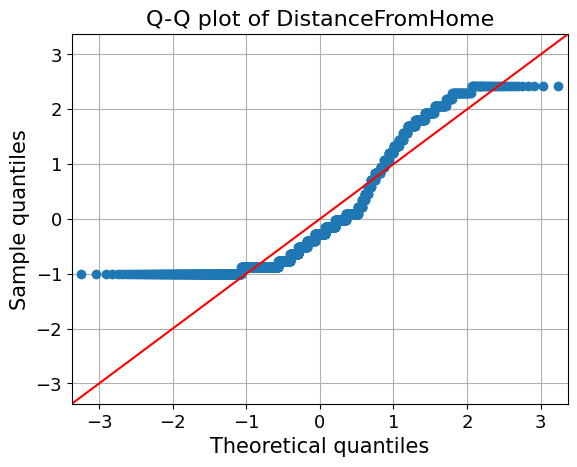

<Figure size 800x500 with 0 Axes>

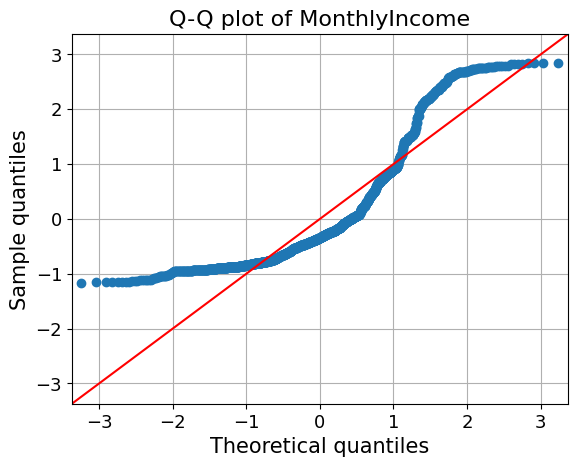

<Figure size 800x500 with 0 Axes>

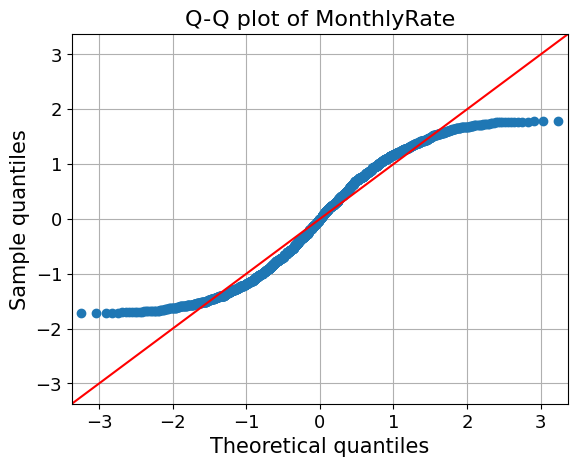

<Figure size 800x500 with 0 Axes>

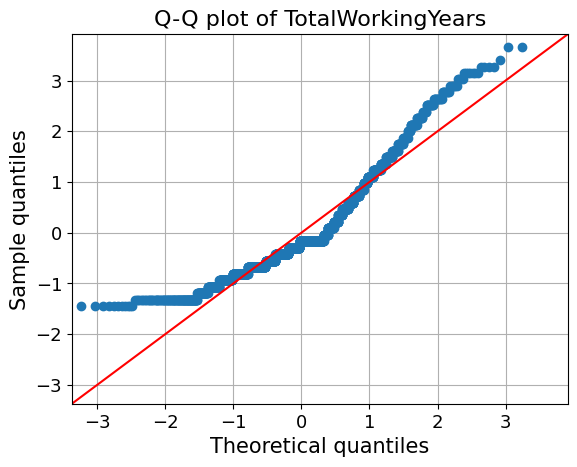

<Figure size 800x500 with 0 Axes>

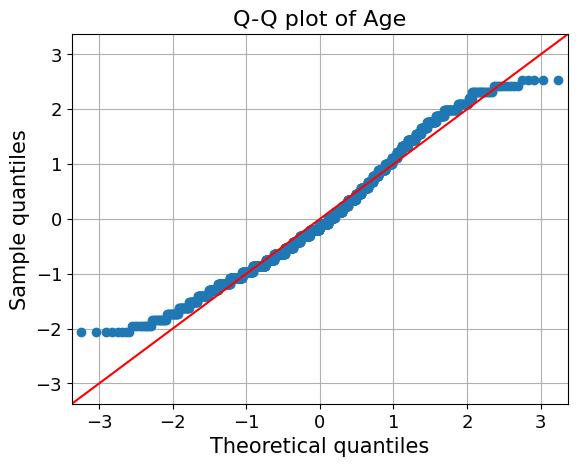

In [21]:
from statsmodels.graphics.gofplots import qqplot
data_col = data_main[['DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 
       'TotalWorkingYears','Age']]
for c in data_col.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_col[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Q- How are the values distributed?


In [23]:
data_main.describe()

,DistanceFromHome,MonthlyIncome,MonthlyRate,TotalWorkingYears,Age
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,9.221957,6516.512530,14287.019690,11.338902,36.866348
std,8.158118,4728.456618,7138.857783,7.834996,9.129126
min,1.000000,1009.000000,2094.000000,0.000000,18.000000
25%,2.000000,2928.250000,7993.000000,6.000000,30.000000
50%,7.000000,4899.000000,14269.500000,10.000000,36.000000
75%,14.000000,8380.250000,20462.000000,15.000000,43.000000
max,29.000000,19999.000000,26999.000000,40.000000,60.000000


This gives a general description of the numeric data i.e mean, standard deviation etc.

Q- Do the range of predictor variables make sense?
Yes, as the distribution of values make sense , we can conclude that the predictor variables make sense.

<Axes: >

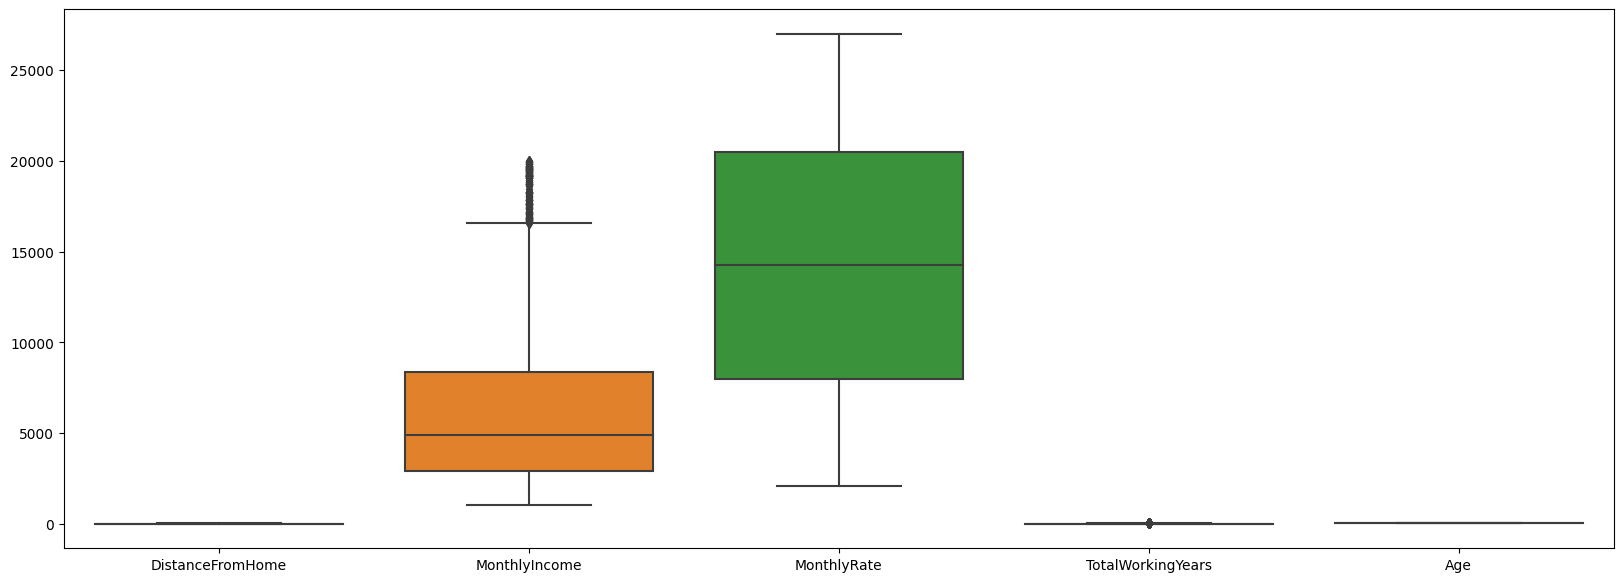

In [24]:
#Data Normalization:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data_main)

<Axes: >

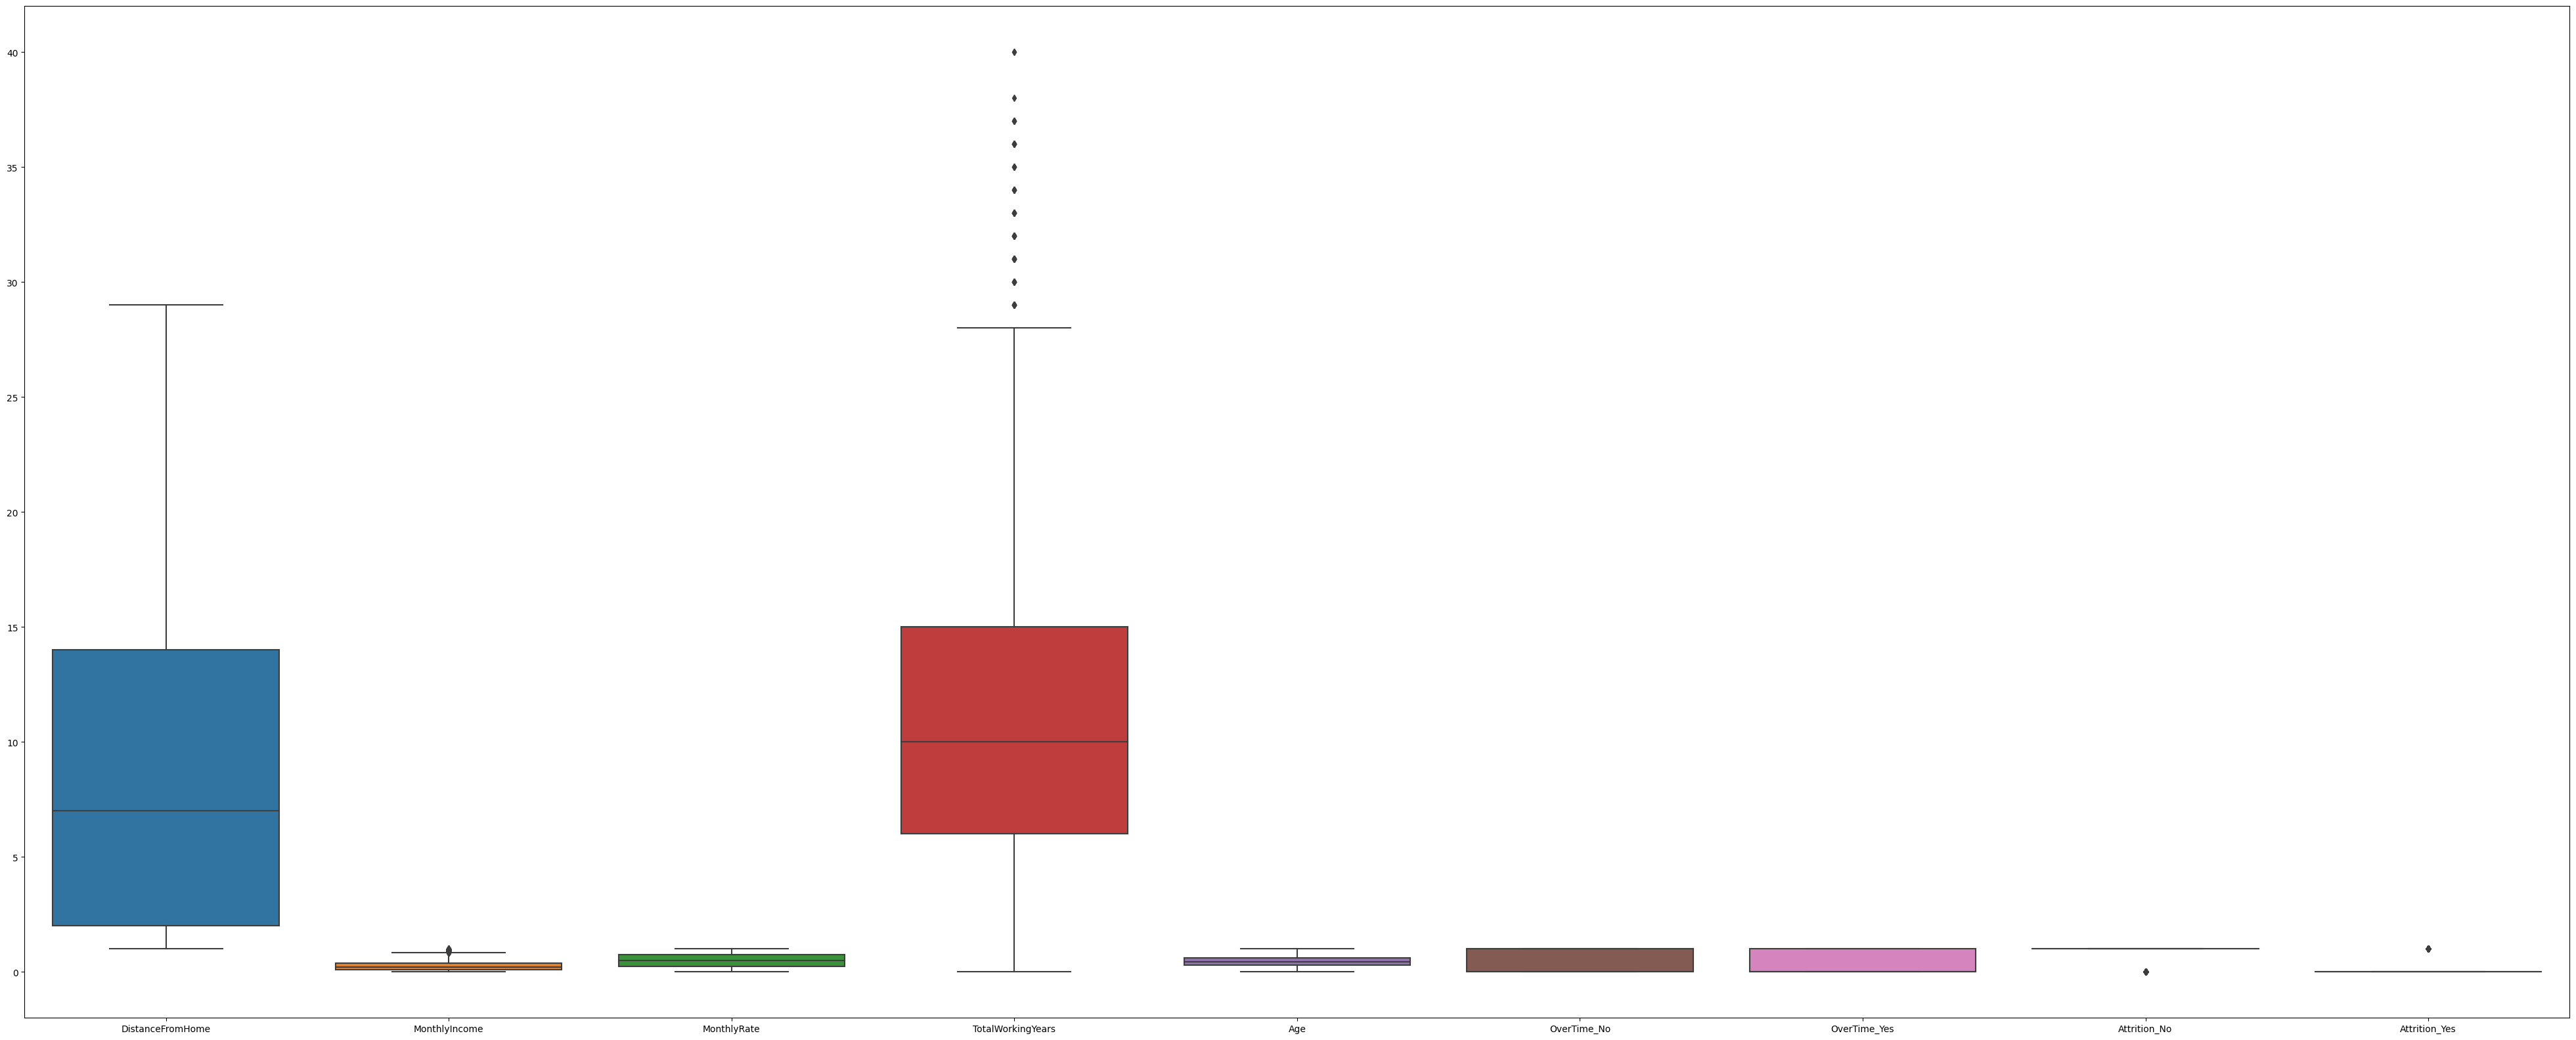

In [25]:
from sklearn import preprocessing
#data_main = data[['Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Department', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']]

dataScaled = pd.get_dummies(data_main)
min_max_scalar = preprocessing.MinMaxScaler()


xMI = dataScaled[['MonthlyIncome']].values.astype(int)
xMIS = min_max_scalar.fit_transform(xMI)
dataScaled['MonthlyIncome'] = pd.DataFrame(xMIS)

xMR = dataScaled[['MonthlyRate']].values.astype(int)
xMRS = min_max_scalar.fit_transform(xMR)
dataScaled['MonthlyRate'] = pd.DataFrame(xMRS)

xA = dataScaled[['Age']].values.astype(int)
xAS = min_max_scalar.fit_transform(xA)
dataScaled['Age'] = pd.DataFrame(xAS)

#for (colName, colValue) in dataScaled.iteritems():
#    xOG = min_max_scalar.fit_transform(colValue)

"""xD = dataScaled[['DistanceFromHome']].values.astype(int)
xDS = min_max_scalar.fit_transform(xD)
dataScaled['DistanceFromHome'] = pd.DataFrame(xDS)



xPSH = dataScaled[['PercentSalaryHike']].values.astype(int)
xPSHS = min_max_scalar.fit_transform(xPSH)
dataScaled['PercentSalaryHike'] = pd.DataFrame(xPSHS)

xTWY = dataScaled[['TotalWorkingYears']].values.astype(int)
xTWYS = min_max_scalar.fit_transform(xTWY)
dataScaled['TotalWorkingYears'] = pd.DataFrame(xTWYS)"""

data_main = dataScaled

plt.figure(figsize=(50, 20))
sns.boxplot(data=data_main)

In [26]:
data_main.corr()

,DistanceFromHome,MonthlyIncome,MonthlyRate,TotalWorkingYears,Age,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
DistanceFromHome,1.000000,-0.041201,0.031672,-0.017663,-0.010079,-0.038182,0.038182,-0.105580,0.105580
MonthlyIncome,-0.041201,1.000000,0.035375,0.772938,0.511378,-0.011969,0.011969,0.193527,-0.193527
MonthlyRate,0.031672,0.035375,1.000000,0.023876,0.025837,-0.014745,0.014745,-0.045744,0.045744
TotalWorkingYears,-0.017663,0.772938,0.023876,1.000000,0.692512,-0.019880,0.019880,0.234182,-0.234182
Age,-0.010079,0.511378,0.025837,0.692512,1.000000,-0.030970,0.030970,0.239984,-0.239984
OverTime_No,-0.038182,-0.011969,-0.014745,-0.019880,-0.030970,1.000000,-1.000000,0.337383,-0.337383
OverTime_Yes,0.038182,0.011969,0.014745,0.019880,0.030970,-1.000000,1.000000,-0.337383,0.337383
Attrition_No,-0.105580,0.193527,-0.045744,0.234182,0.239984,0.337383,-0.337383,1.000000,-1.000000
Attrition_Yes,0.105580,-0.193527,0.045744,-0.234182,-0.239984,-0.337383,0.337383,-1.000000,1.000000


<Axes: >

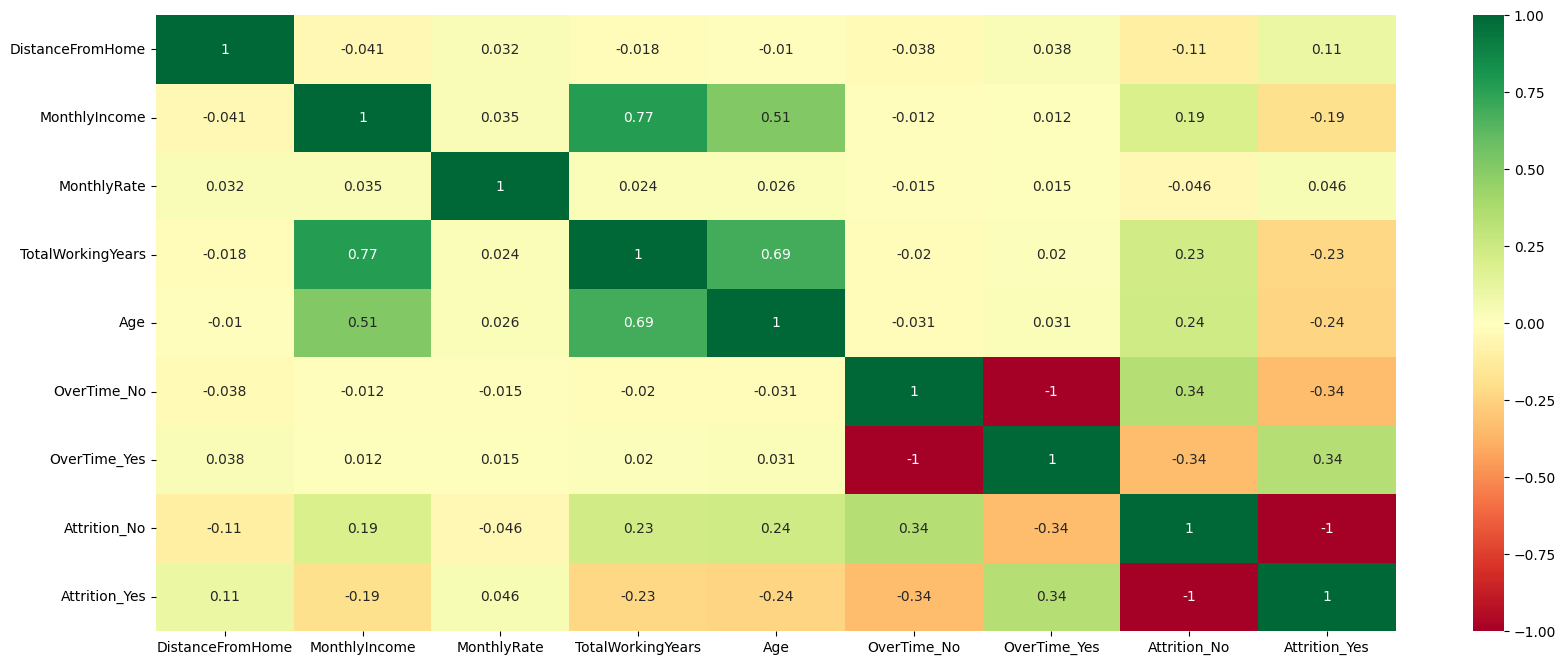

In [27]:
plt.figure(figsize=(20,8))
sns.heatmap(data_main.corr(), annot=True, cmap='RdYlGn')

In [31]:
import statsmodels.api as sm

model = sm.OLS(data_main.Attrition, data_main).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Attrition   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.998e+31
Date:                Tue, 04 Apr 2023   Prob (F-statistic):                        0.00
Time:                        00:25:46   Log-Likelihood:                          56267.
No. Observations:                1676   AIC:                                 -1.125e+05
Df Residuals:                    1669   BIC:                                 -1.125e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
DistanceFromHome  -4.432e-18   1.89e-18     -2.349      0.019   -8.13e-18   -7.32e-19
MonthlyIncome      1.368e-19   5.17e-21     26.480      0.000    1.27e-19    1.47e-19
MonthlyRate        -4.15e-20   2.05e-21    -20.231      0.000   -4.55e-20   -3.75e-20
TotalWorkingYears  -6.44e-17   3.53e-18    -18.255      0.000   -7.13e-17   -5.75e-17
OverTime           8.622e-16    3.7e-17     23.318      0.000     7.9e-16    9.35e-16
Age                 8.89e-18   1.36e-18      6.548      0.000    6.23e-18    1.16e-17
Attrition             1.0000   5.28e-17   1.89e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       39.190   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.534
Skew:                          -0.385   Prob(JB):                     9.57e-10
Kurtosis:                       3.023   Cond. No.                     6.12e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
from sklearn.model_selection import train_test_split

x = data_main[['DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 
       'TotalWorkingYears','OverTime','Age','Attrition']]
#x = data_main[['BusinessTravel', 'DistanceFromHome', 'Department', 'JobSatisfaction', 'PercentSalaryHike', 'WorkLifeBalance', 'YearsAtCompany']]
y = data_main[['Attrition']]

print(x.head())

   DistanceFromHome  MonthlyIncome  MonthlyRate  TotalWorkingYears  OverTime  \
0                 1           5993        19479                  8         1   
1                 8           5130        24907                 10         0   
2                 2           2090         2396                  7         1   
3                 3           2909        23159                  8         1   
4                 2           3468        16632                  6         0   

   Age  Attrition  
0   41          0  
1   49          0  
2   37          1  
3   33          0  
4   27          0  


In [33]:
X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [34]:
check_df = pd.merge(
    X_t,
    X_test,
    on=['DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 
       'TotalWorkingYears','OverTime','Age','Attrition'],
    how="left",
    indicator="Exist",
)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(
    check_df["Exist"].value_counts()
) 

False    1474
True       34
Name: Exist, dtype: int64


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[[ 2.81973079e-03 -5.13563436e-05  1.65158183e-05 -4.45502630e-02
   9.53453747e-01 -2.81853554e-02  7.92168439e+00]]
         ColumnNames  Coefficients
0   DistanceFromHome      0.002820
1      MonthlyIncome     -0.000051
2        MonthlyRate      0.000017
3  TotalWorkingYears     -0.044550
4           OverTime      0.953454
5                Age     -0.028185
6          Attrition      7.921684


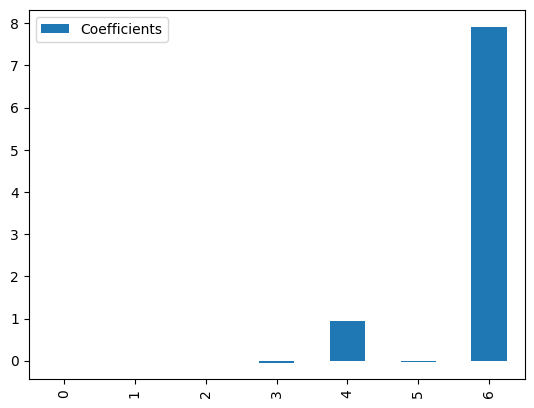

In [35]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

scaler = preprocessing.StandardScaler().fit(x_train)
lregr = LogisticRegression(solver='lbfgs', max_iter=300)
lregr.fit(x_train, y_train.values.ravel())

print(lregr.coef_)
#ax = x_train.plot.bar(y = lregr.coef_)
pad = pd.DataFrame()
pad['ColumnNames'] = x_train.columns.values
pad['Coefficients'] = lregr.coef_[0]
pad.plot.bar()
print(pad)

In [36]:
y_predict = lregr.predict(x_train)
print('Mean squared error is: {}'.format(mean_squared_error(y_train, y_predict)))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_predict))
r2 = r2_score(y_train,y_predict)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_train,y_predict)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.0
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0
Accuracy score is: 1.0


In [37]:
y_pred = lregr.predict(X_test)
print('Mean squared error is: {}'.format(mean_squared_error(y_test,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_test,y_pred)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.0
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0
Accuracy score is: 1.0


In [38]:
y_pred = lregr.predict(x_val)
print('Mean squared error is: {}'.format(mean_squared_error(y_val,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2 = r2_score(y_val,y_pred)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_val,y_pred)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.0
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0
Accuracy score is: 1.0


In [39]:
from scipy import stats
def removeOutliers(df):
  data = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
  return data

# Removing outliers from the datasets for training and testing
data_main_NoOutliers = removeOutliers(data_main)
x = data_main_NoOutliers[['DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 
       'TotalWorkingYears','OverTime','Age','Attrition']]
#x = data_main[['BusinessTravel', 'DistanceFromHome', 'Department', 'JobSatisfaction', 'PercentSalaryHike', 'WorkLifeBalance', 'YearsAtCompany']]
y = data_main_NoOutliers[['Attrition']]
X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)
scaler = preprocessing.StandardScaler().fit(x_train)
lregr = LogisticRegression(solver='lbfgs', max_iter=300)
lregr.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=300)

In [40]:
y_predict = lregr.predict(x_train)
print('Mean squared error is: {}'.format(mean_squared_error(y_train, y_predict)))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_predict))
r2 = r2_score(y_train,y_predict)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_train,y_predict)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.0
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0
Accuracy score is: 1.0


In [41]:
y_pred = lregr.predict(X_test)
print('Mean squared error is: {}'.format(mean_squared_error(y_test,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_test,y_pred)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.0
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0
Accuracy score is: 1.0


In [42]:
y_pred = lregr.predict(x_val)
print('Mean squared error is: {}'.format(mean_squared_error(y_val,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2 = r2_score(y_val,y_pred)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_val,y_pred)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.013392857142857142
Coefficient of determination: 0.88
R^2 score on tarining set = 0.8845360824742268
Accuracy score is: 0.9866071428571429


In [43]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
data_mainImpute = data_main.copy(deep=True)
def removeRandomData(dataset, percent, col):
    dataset.loc[dataset.sample(frac = percent).index, col] = np.nan
#removeRandomData(data_mainImpute, 0.05, 'TotalWorkingYears')
#Imputation of 10% of the data
data_mainImpute['TotalWorkingYears_10'] = data_mainImpute['TotalWorkingYears']
data_mainImpute['TotalWorkingYears_05'] = data_mainImpute['TotalWorkingYears']
data_mainImpute['TotalWorkingYears_01'] = data_mainImpute['TotalWorkingYears']

removeRandomData(data_mainImpute, 0.10, 'TotalWorkingYears_10')
removeRandomData(data_mainImpute, 0.05, 'TotalWorkingYears_05')
removeRandomData(data_mainImpute, 0.01, 'TotalWorkingYears_01')
print(data_mainImpute.isnull().sum())

DistanceFromHome          0
MonthlyIncome             0
MonthlyRate               0
TotalWorkingYears         0
OverTime                  0
Age                       0
Attrition                 0
TotalWorkingYears_10    168
TotalWorkingYears_05     84
TotalWorkingYears_01     17
dtype: int64


In [44]:
df_number1 = data_mainImpute[['Age', 'MonthlyIncome', 'TotalWorkingYears_01']]
df_number5 = data_mainImpute[['Age', 'MonthlyIncome', 'TotalWorkingYears_05']]
df_number10 = data_mainImpute[['Age', 'MonthlyIncome', 'TotalWorkingYears_10']]
df_orignal = data_mainImpute['TotalWorkingYears']

In [45]:
### Specifying the imputer. ###
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

### FOR the 1 % imputed values using Mean method ###
mean_imputer = mean_imputer.fit(df_number1)
results = mean_imputer.transform(df_number1.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number1.columns)
print(imputed_number_df.isnull().sum())
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_01'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_01'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100

mean_imputer = mean_imputer.fit(df_number5)
results = mean_imputer.transform(df_number5.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number5.columns)
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_05'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_05'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100

mean_imputer = mean_imputer.fit(df_number10)
results = mean_imputer.transform(df_number10.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number10.columns)
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_10'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100


print("The perecent change of the orignal vs imputed value for 1% missing data is: {}".format(percent_change_1))
print("The perecent change of the orignal vs imputed value for 5% missing data is: {}".format(percent_change_5))
print("The perecent change of the orignal vs imputed value for 10% missing data is: {}".format(percent_change_10))

Age                     0
MonthlyIncome           0
TotalWorkingYears_01    0
dtype: int64
The perecent change of the orignal vs imputed value for 1% missing data is: 1.4610405958099393
The perecent change of the orignal vs imputed value for 5% missing data is: -9.577121886281043
The perecent change of the orignal vs imputed value for 10% missing data is: -3.112437722757865


X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names


In [46]:
### Specifying the imputer. ###
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

### FOR the 1 % imputed values using Median method ###
mean_imputer = mean_imputer.fit(df_number1)
results = mean_imputer.transform(df_number1.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number1.columns)
print(imputed_number_df.isnull().sum())
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_01'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_01'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100

mean_imputer = mean_imputer.fit(df_number5)
results = mean_imputer.transform(df_number5.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number5.columns)
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_05'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_05'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100

mean_imputer = mean_imputer.fit(df_number10)
results = mean_imputer.transform(df_number10.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number10.columns)
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_10'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100


print("The perecent change of the orignal vs imputed value for 1% missing data is: {}".format(percent_change_1))
print("The perecent change of the orignal vs imputed value for 5% missing data is: {}".format(percent_change_5))
print("The perecent change of the orignal vs imputed value for 10% missing data is: {}".format(percent_change_10))

Age                     0
MonthlyIncome           0
TotalWorkingYears_01    0
dtype: int64
The perecent change of the orignal vs imputed value for 1% missing data is: 2.8042959427207634
The perecent change of the orignal vs imputed value for 5% missing data is: -2.386634844868735
The perecent change of the orignal vs imputed value for 10% missing data is: 10.620525059665871


X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names


In [47]:
from sklearn.metrics import accuracy_score
imputer = KNNImputer(n_neighbors=7)
### For the 1% imputation ###
imputer.fit_transform(df_number1)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number1), columns = df_number1.columns)
print(imputed_number_df.isnull().sum())
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_01'] = data_main['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_01'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100
print("The perecent change of the orignal vs imputed value of 1% values is: {}".format(percent_change_1))

### For the 5% imputation ###
imputer.fit_transform(df_number5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number5), columns = df_number5.columns)
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_05'] = data_main['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_05'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100
print("The perecent change of the orignal vs imputed value of 5% values is: {}".format(percent_change_5))

### For the 10% imputation ###
imputer.fit_transform(df_number10)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number10), columns = df_number10.columns)
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_10'] = data_main['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100
print("The perecent change of the orignal vs imputed value of 10% values is: {}".format(percent_change_10))

#dataFrame_knn_imputation = imputed_number_df[['orignalVimputed_01', 'orignalVimputed_05', 'orignalVimputed_10']]

Age                     0
MonthlyIncome           0
TotalWorkingYears_01    0
dtype: int64
The perecent change of the orignal vs imputed value of 1% values is: 1.2529832935560858
The perecent change of the orignal vs imputed value of 5% values is: -4.653937947494034
The perecent change of the orignal vs imputed value of 10% values is: -3.9379474940334136
